# 🧹 Step 2 - Data Analysis and Visualization

## 📚 Course 4: Data Cleaning and Analysis

## 3️⃣ Transforming data with pandas

---

👦 [Anh-Thi DINH](https://dinhanhthi.com) — 🔥 [dataquest-aio](https://github.com/dinhanhthi/dataquest-aio) on Github — 🌏 [Dataquest](https://dataquest.io/)

⚡ **Note**: Some errors in this notebook appear intentionally to illustrate the wrong commands.

❓ You run this notebook on Google Colab? If "Yes", please replace `0` by `1` in the below cell and run it first.

In [1]:
use_colab = 0 # 1 if you use Google Colab to read/run this notebook

## 📝 Mission 345

⏬ Download the takeaway for this mission in folder `/takeaways/` [on Github](https://github.com/dinhanhthi/dataquest-aio/tree/master/takeaways). [Source](https://app.dataquest.io/m/345/transforming-data-with-pandas) of this mission.

🎯 In this mission, we are going to analyze the factors that contribute happiness. *Which of the factors above contribute the most to the happiness score?*

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

💡 We are going to explore teh usage of: [`Series.map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [`Series.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html), [`DataFrame.applymap()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html), [`DataFrame.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), [`pd.melt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) in order to answer above question.

In [1]:
import pandas as pd # import pandas package
import numpy as np

# show the plots inside the notebook
%matplotlib inline 

In [3]:
if use_colab:
    dataquest_aio = 'https://raw.githubusercontent.com/dinhanhthi/dataquest-aio/master/step-2-data-analysis-and-visualization/'
    dataset_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/World_Happiness_2015.csv'
else: # if you use localhost
    dataset_url = './data/World_Happiness_2015.csv'

In [4]:
happiness2015 = pd.read_csv(dataset_url) # read the data set
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Recall the meaning of columns:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

First, we need to rename some columns in the dataset following below dictionary `mapping`.

In [6]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis = 1) # rename multi-columns using a dictionary

In [8]:
# show the list of columns' names
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
# let's take a look on the values in each column
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It's a little difficult to work with a range of random numbers. It will be better if we can translate these numbers to categories. Let's try with column `Economy`. We want to translate number which are lower than `1` to `Low` (affect) and otherwise to `High` (affect). 

In [32]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
equal = economy_impact_map.equals(economy_impact_apply) # check if they are the same?

display(equal)

True

In [20]:
# take a look on first 10 values
economy_impact_apply[:10]

0    High
1    High
2    High
3    High
4    High
5    High
6    High
7    High
8    High
9    High
Name: Economy, dtype: object

You can either assign the results back to the original column or create a new column. We recommend creating a new column.

In [21]:
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

In [23]:
happiness2015.head() # look on the last column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High


❓ Can we change the number of `1` in the `label` function above?

In [30]:
def label_x(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [31]:
# try with `map`
economy_map = happiness2015['Economy'].map(label_x, x = .8)

TypeError: map() got an unexpected keyword argument 'x'

In [33]:
# we CAN'T work with `map` in this case
# let's try with `apply`
economy_map = happiness2015['Economy'].apply(label_x, x = .8)

⭐ So, if you wanna apply a transform function with custom arguments, you have to use `.apply()` instead of `.map()`!

Now, we wanna apply the same way to other impacts (Health, Family,...). You can use multiple lines to do these tasks. But we wanna apply 1 time for multi-columns. 

❓ Is there any way allowing us to do so?

💡 It's time to use `.applymap()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html).

In [35]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] # column name
factors_impact = happiness2015[factors].applymap(label) # apply 1 time for many columns

# let's have a look on first 5 rows of the result
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


⭐ According to our definition, the Economy and Family columns had a high impact on the happiness scores of the first five countries. But they are good?

In [36]:
# we wanna know how many each of `High` and `Low` in each column
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [37]:
# can we use `apply` for multiple columns with an element-wise function like `label`? Let's try
happiness2015[factors].apply(label)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index Economy')

⭐ The error indicates that, we CAN'T use `.apply()` with an *element-wise function* to multiple columns. In the case of using it with `pd.value_counts`, it works because `pd.value_counts` operates on a *Series*.

❓ Calculates the percentage of `High` and `Low`values in each column.

In [38]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


⭐ **Interesting**: The sum of the six factors and the `Dystopia Residual` column equals the happiness score:

In [39]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

In [42]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col): # find the percentage of each column as a proportion of the happiness score
    div = col/happiness2015['Happiness Score'] 
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


## 👉 Change the shape with `pd.melt()`

Look back again our `happines2015` dataset,

In [45]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Factors Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,7.56092
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,7.52708
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,7.52222
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,7.42694


Each country has 6 columns of 6 factors and 1 columns of `Dystopia Residual`. These 7 columns are considered as the main factors affecting much on the happiness scores. In order to work more easily with "these factors AS ONE", we would like to "reshape" our dataset into a new dataset in which there is a column containing the types of factors and a column containing their values. Let's use `pd.melt()` [function](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.melt.html) to perform this idea.

In [47]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'] # columns will be kept (they are fix as ids)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'] # columns will be melt
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors) # new dataset
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2) # add a column of percentages

melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


## 👉 Using `.apply` (non-vectorized) vs vectorized methods

⭐ **Remark**: In general, we SHOULD ONLY USE the `apply()` method when a vectorized function does not exist. Recall that pandas uses *vectorization*, the process of applying operations to whole series at once, to optimize performance. When we use the `apply()` method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the `apply()` method.

Take a look again on the line of creating column `Percentage`,

``` python
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2) # add a column of percentages
```

We've used the vectorized method to compute values in this column. It's faster then the way we compute them using `.apply` in the part of `factor_percentages`.

👉 Next, let's group the data by the `variable` column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average.

💡 Do the same way as in [the previous task](https://github.com/dinhanhthi/dataquest-aio/blob/master/step-2-data-analysis-and-visualization/course-4-data-cleaning-and-analysis/task-2-combining-data-with-pandas.ipynb) of using `.pivot_table` to combine the 2015, 2016, and 2017 reports, aggregated the data by the Year column.

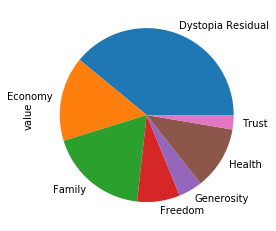

In [50]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)

👉 **Further reading**: If you wanna do an inverse task (un-melt data)? You can use `df.pivot()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) (it's different from `df.pivot_table()`). Below is an example,

In [3]:
# Below codes are only for displaying multiple dataframes side-by-side, it's not a part of this lesson!
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [15]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
...                            'two'],
...                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
...                    'baz': [1, 2, 3, 4, 5, 6],
...                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

pivot_1 = df.pivot(index='foo', columns='bar', values='baz')
pivot_2 = df.pivot(index='foo', columns='bar')['baz']
pivot_3 = df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

display_side_by_side(df, pivot_1, pivot_2, pivot_3)

foo 
 bar 
 baz 
 zoo 
 
 
 
 
 0 
 one 
 A 
 1 
 x 
 
 
 1 
 one 
 B 
 2 
 y 
 
 
 2 
 one 
 C 
 3 
 z 
 
 
 3 
 two 
 A 
 4 
 q 
 
 
 4 
 two 
 B 
 5 
 w 
 
 
 5 
 two 
 C 
 6 
 t 
 
 
 
 
 
 bar 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 
 
 two 
 4 
 5 
 6 
 
 
 
 
 
 bar 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 
 
 two 
 4 
 5 
 6 
 
 
 
 
 
 
 baz 
 zoo 
 
 
 bar 
 A 
 B 
 C 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 x 
 y 
 z 
 
 
 two 
 4 
 5 
 6 
 q 
 w 
 t

In [7]:
df_melt = pd.melt(pivot_1, id_vars='A', value_vars=['B', 'C'])
display_side_by_side(pivot_1, df_melt)

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6
,A,bar,value
0,1,B,2
1,4,B,5
2,1,C,3
3,4,C,6


In [17]:
pivot_1.reset_index(level=0, inplace=True)
pivot_1

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [11]:
pivot_1['A']

0    1
1    4
Name: A, dtype: int64

In [13]:
pivot_2.reset_index(inplace=True)
pivot_2

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6
